In [3]:
from src.modules.data_clean import visualise_raw_data, ica_plot, iclabel_visual, read_data, iclabel_save,clean_dataset
from src.modules.feature_ext import combine_data, compute_psd, compute_band_power, save_band_power_to_csv
from src.modules.random_forest import train_model, classify_new_data, load_and_label
import os 

first, we read the .set file format using the mne "read_raw_eeglab" function, then we visualised the 
raw eeg data using a basic plot function and band pass filtering the data from 0.5 to 45 Hz, the relevant 
brain activity according to the litureture 

In [4]:
file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/raw/a001.set"
raw_eeg = read_data(file_path)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)

Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


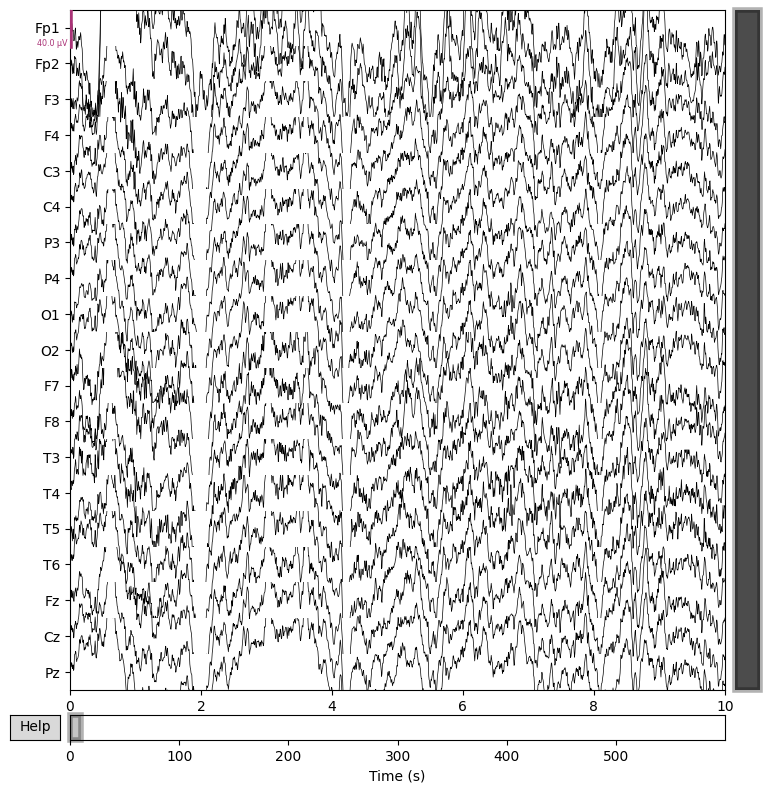

In [5]:
visualise_raw_data(raw_eeg)

Now, we want to automaticly ICA filter the face muscle and eye movement noise. first, we must visualise  the topography of the ica to get a better feel of what we are going to filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.4s.


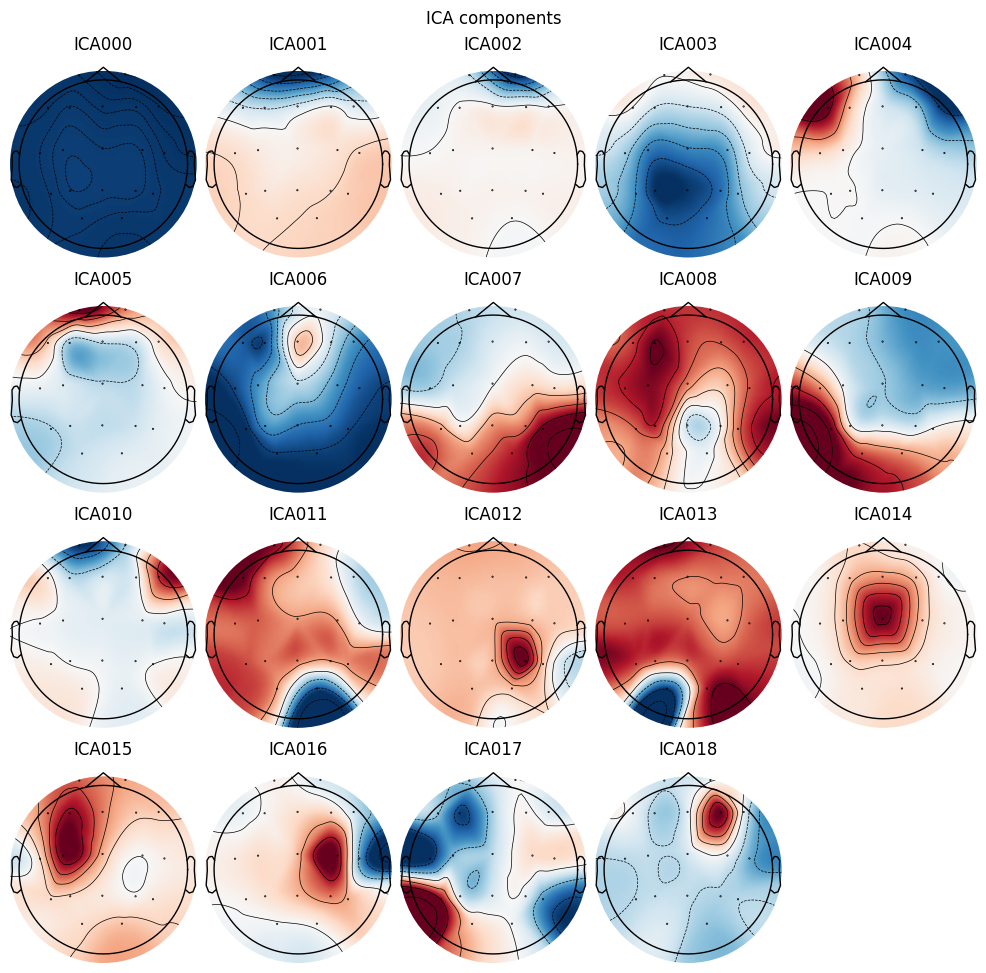

In [6]:
ica_plot(raw_eeg)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA took 1.7s.


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:74: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  labels = label_components(data, ica, method="iclabel")
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:74: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  labels = label_components(data, ica, method="iclabel")
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:74: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was design

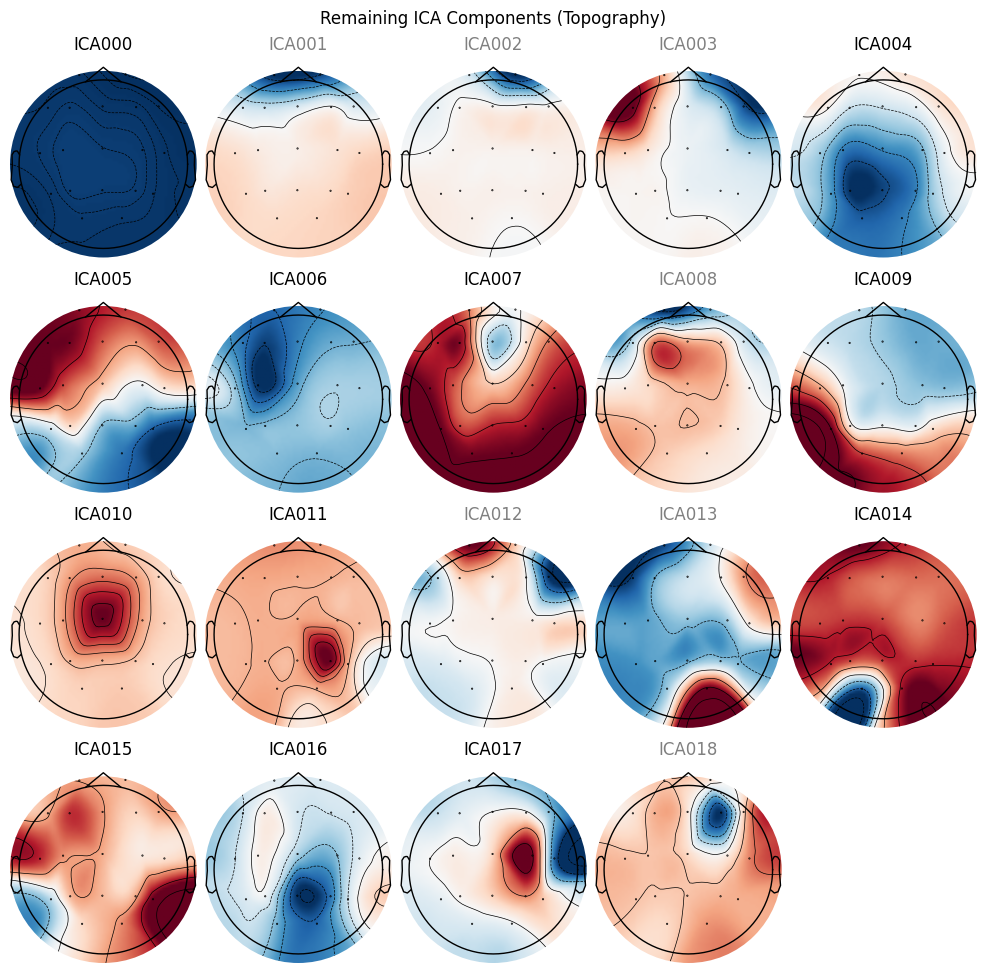

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 7 ICA components
    Projecting back using 19 PCA components


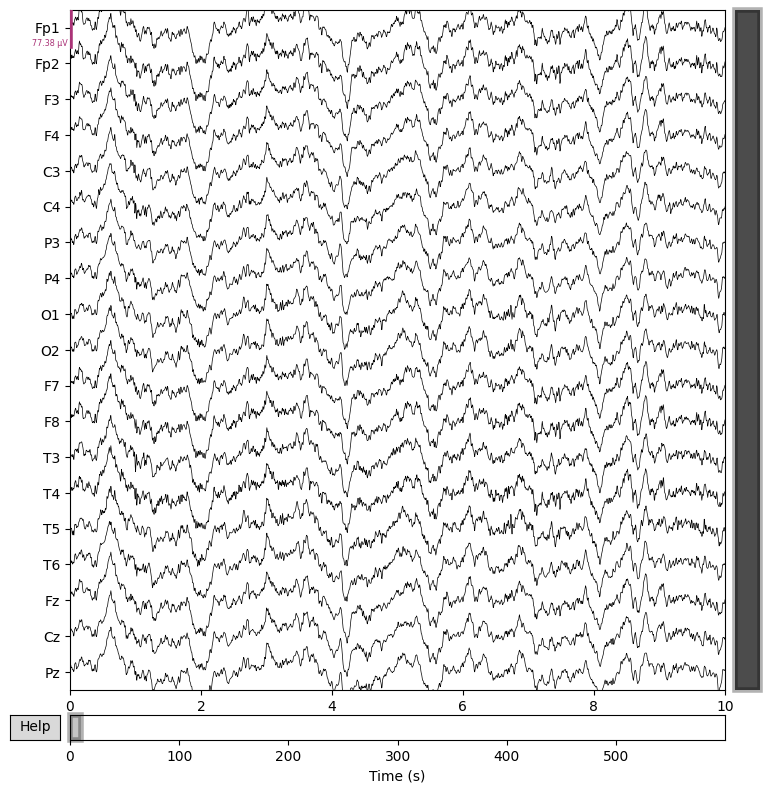

<RawEEGLAB | a001.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>

In [7]:
iclabel_visual(raw_eeg)

Now we run the same automatic ica filtering through the entire database 

In [8]:

# Process all .set files in the specified directory
i = 0
while i < 2:
    if i == 0: 
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/data/alzhimer/raw"
        clean_dataset(file_path)
    elif i == 1: 
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/data/control/raw"
        clean_dataset(file_path)
    else:
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEGס-project/data/frontotemporal/raw"
        clean_dataset(file_path)
    i += 1 


Now we can combine our data to create a united power spectral density plot to visualise the diffrences between each group 

In [9]:
combined_alz = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/clean")
combined_con = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/clean")
combined_ft = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/clean")

/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:28: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw: mne.io.BaseRaw = mne.io.read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:28: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw: mne.io.BaseRaw = mne.io.read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:28: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is corre

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


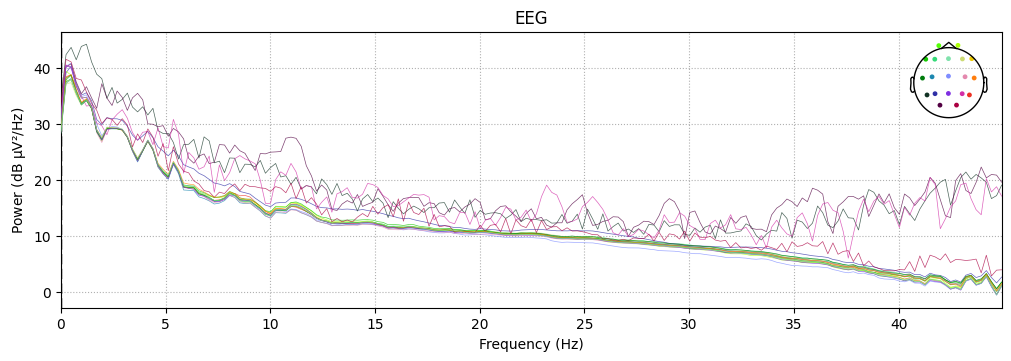

In [10]:
compute_psd(combined_alz) #Alzhimer 

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


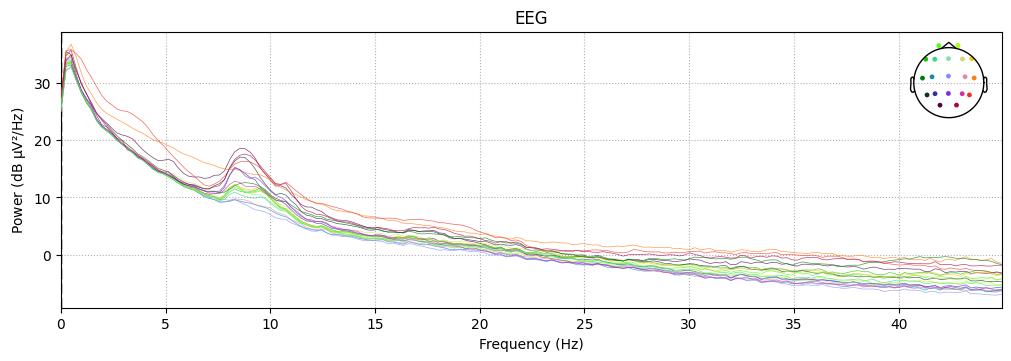

In [11]:
compute_psd(combined_con) #Control 

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


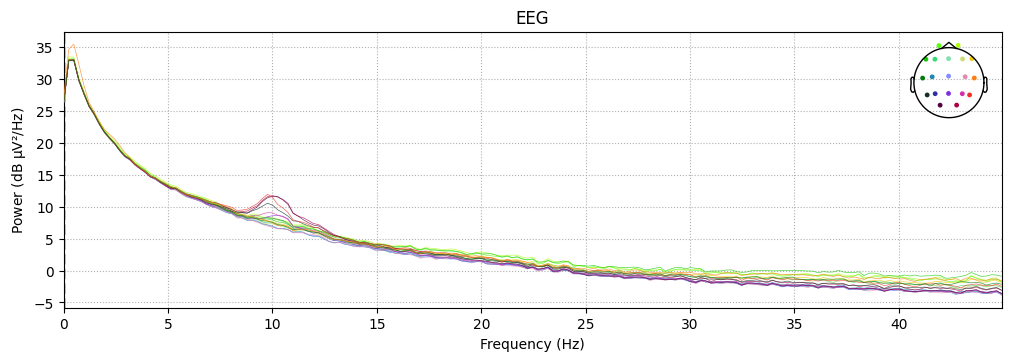

In [12]:
compute_psd(combined_ft) # Fronto-temporal dementia 

Now, we want to run a random forest classifier to see if the diffrence can be predicted. to do that, we must compute the average power for each band, and save it into a matrix in  a csv format. 

In [13]:

# Base directory for your dataset
base_dir = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data"  

# Groups and prefixes
groups = {
    "frontotemporal": "f",
    "control": "c",
    "alzhimer": "a",
}

# Loop through each group and process the files
for group, prefix in groups.items():
    # Paths for clean data and band power directories
    clean_data_dir = os.path.join(base_dir, group, "clean")
    band_power_dir = os.path.join(base_dir, group, "band_power")
    
    # Ensure the band power directory exists
    os.makedirs(band_power_dir, exist_ok=True)
    
    # Process each file in the clean data directory
    for i in range(1, 6):  # Assuming files are numbered 1 to 5
        file_name = f"{prefix}{i:03d}_cleaned.set"
        input_path = os.path.join(clean_data_dir, file_name)
        output_path = os.path.join(band_power_dir, f"{prefix}{i:03d}_bp.csv")
        
        # Check if the file exists
        if os.path.exists(input_path):
            cleaned_data = read_data(input_path)
            save_band_power_to_csv(cleaned_data, output_path)
        else:
            print(f"File not found: {input_path}")

/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your chann

Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f001_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f002_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f003_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f004_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f005_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c001_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c002_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c003_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c004_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c005_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your chann

Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a001_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a002_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a003_bp.csv


/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:20: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  read_eeg = read_raw_eeglab(file_path, preload=True)


Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a004_bp.csv
Band power data saved to /Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a005_bp.csv


Now, we can use the csv files to train a random forest model. 

In [14]:
# Load the files 
files_frontotemporal = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f{i:03d}_bp.csv"
    for i in range(1, 6)
]
files_control = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c{i:03d}_bp.csv"
    for i in range(1, 6)
]
files_alzhimer = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a{i:03d}_bp.csv"
    for i in range(1, 6)
]
# Train the model 
model, x = train_model(files_frontotemporal, files_control, files_alzhimer)


Confusion Matrix:
 [[28  0  0]
 [ 2 23  1]
 [ 1  1 30]]

Classification Report:
                          precision    recall  f1-score   support

              Alzheimer       0.90      1.00      0.95        28
                Control       0.96      0.88      0.92        26
Frontotemporal Dementia       0.97      0.94      0.95        32

               accuracy                           0.94        86
              macro avg       0.94      0.94      0.94        86
           weighted avg       0.94      0.94      0.94        86



now we will test the model by feeding new unlabeled data to it

Fronto-temporal: 

In [15]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/f006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Frontotemporal Dementia
    Delta (0.5–4 Hz)  Theta (4–8 Hz)  ...  Gamma (30-45 Hz)          Predicted_Label
0       2.372289e-09    1.535647e-10  ...      2.241722e-11                  Control
1       2.373374e-09    1.511275e-10  ...      2.820986e-11                  Control
2       2.240850e-09    1.427606e-10  ...      1.094749e-11                  Control
3       2.271771e-09    1.419546e-10  ...      1.169629e-11  Frontotemporal Dementia
4       2.217825e-09    1.388882e-10  ...      8.901750e-12  Frontotemporal Dementia
5       2.231620e-09    1.377381e-10  ...      8.729462e-12  Frontotemporal Dementia
6       2.232662e-09    1.463796e-10  ...      1.210435e-11                Alzheimer
7       2.235258e-09    1.460923e-10  ...      9.913915e-12                Alzheimer
8       2.279656e-09    1.708476e-10  ...      2.511881e-11  Frontotemporal Dementia
9       2.275296e-09    1.818950e-10  ...      1.956492e-11  Frontotemporal Dementia
10      2.238537e-09 

,Delta (0.5–4 Hz),Theta (4–8 Hz),Alpha (8–13 Hz),Beta (13–30 Hz),Gamma (30-45 Hz),Predicted_Label
0,2.372289e-09,1.535647e-10,9.283000e-11,6.347515e-11,2.241722e-11,Control
1,2.373374e-09,1.511275e-10,9.316269e-11,7.090142e-11,2.820986e-11,Control
2,2.240850e-09,1.427606e-10,7.865297e-11,4.551502e-11,1.094749e-11,Control
3,2.271771e-09,1.419546e-10,7.589926e-11,4.718792e-11,1.169629e-11,Frontotemporal Dementia
4,2.217825e-09,1.388882e-10,5.501572e-11,4.143467e-11,8.901750e-12,Frontotemporal Dementia
5,2.231620e-09,1.377381e-10,5.259294e-11,4.125662e-11,8.729462e-12,Frontotemporal Dementia
6,2.232662e-09,1.463796e-10,1.815664e-10,5.967729e-11,1.210435e-11,Alzheimer
7,2.235258e-09,1.460923e-10,1.984929e-10,5.651700e-11,9.913915e-12,Alzheimer
8,2.279656e-09,1.708476e-10,5.186937e-10,1.139235e-10,2.511881e-11,Frontotemporal Dementia
9,2.275296e-09,1.818950e-10,6.337961e-10,1.233045e-10,1.956492e-11,Frontotemporal Dementia


In [16]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/c006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Control
    Delta (0.5–4 Hz)  Theta (4–8 Hz)  ...  Gamma (30-45 Hz)          Predicted_Label
0       1.085960e-08    2.521042e-10  ...      3.433292e-10  Frontotemporal Dementia
1       5.574811e-09    2.084547e-10  ...      2.819775e-10  Frontotemporal Dementia
2       6.447626e-09    2.375694e-10  ...      2.312383e-10                  Control
3       1.599274e-08    1.818566e-10  ...      1.749634e-10                  Control
4       2.502757e-09    1.531979e-10  ...      1.536820e-10                  Control
5       2.531112e-09    1.532484e-10  ...      1.445729e-10                  Control
6       2.885844e-09    1.699221e-10  ...      7.999898e-11                  Control
7       2.987723e-09    1.761315e-10  ...      1.178577e-10                  Control
8       1.323460e-08    2.743006e-10  ...      1.351943e-10                  Control
9       1.343783e-08    3.094103e-10  ...      1.572604e-10                  Control
10      5.754345e-09    2.347397e-10 

,Delta (0.5–4 Hz),Theta (4–8 Hz),Alpha (8–13 Hz),Beta (13–30 Hz),Gamma (30-45 Hz),Predicted_Label
0,1.085960e-08,2.521042e-10,1.085320e-10,3.715631e-10,3.433292e-10,Frontotemporal Dementia
1,5.574811e-09,2.084547e-10,9.619502e-11,3.176542e-10,2.819775e-10,Frontotemporal Dementia
2,6.447626e-09,2.375694e-10,1.002616e-10,2.559381e-10,2.312383e-10,Control
3,1.599274e-08,1.818566e-10,7.557037e-11,1.807707e-10,1.749634e-10,Control
4,2.502757e-09,1.531979e-10,6.502857e-11,1.659567e-10,1.536820e-10,Control
5,2.531112e-09,1.532484e-10,6.585353e-11,1.601874e-10,1.445729e-10,Control
6,2.885844e-09,1.699221e-10,1.014905e-10,1.269021e-10,7.999898e-11,Control
7,2.987723e-09,1.761315e-10,1.177183e-10,1.533434e-10,1.178577e-10,Control
8,1.323460e-08,2.743006e-10,2.831428e-10,2.074179e-10,1.351943e-10,Control
9,1.343783e-08,3.094103e-10,2.733352e-10,2.251827e-10,1.572604e-10,Control


and alzhimer: 

In [17]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/a006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Alzheimer
    Delta (0.5–4 Hz)  Theta (4–8 Hz)  ...  Gamma (30-45 Hz)  Predicted_Label
0       1.637776e-08    2.124745e-09  ...      1.895218e-10        Alzheimer
1       1.862370e-08    2.171827e-09  ...      1.867009e-10        Alzheimer
2       1.628634e-08    2.112729e-09  ...      2.193584e-10        Alzheimer
3       1.596411e-08    2.098977e-09  ...      2.120271e-10        Alzheimer
4       1.629407e-08    2.010383e-09  ...      2.067204e-10        Alzheimer
5       1.624408e-08    2.084208e-09  ...      2.043415e-10        Alzheimer
6       2.450501e-08    4.032416e-09  ...      2.421172e-10        Alzheimer
7       2.237711e-08    6.289074e-09  ...      1.901073e-09        Alzheimer
8       4.659692e-08    8.787602e-09  ...      2.929817e-09        Alzheimer
9       2.861851e-08    3.602713e-09  ...      3.257261e-10        Alzheimer
10      1.720199e-08    2.235803e-09  ...      1.995767e-10        Alzheimer
11      1.651940e-08    2.130708e-09  ...     

,Delta (0.5–4 Hz),Theta (4–8 Hz),Alpha (8–13 Hz),Beta (13–30 Hz),Gamma (30-45 Hz),Predicted_Label
0,1.637776e-08,2.124745e-09,6.802880e-10,7.777054e-10,1.895218e-10,Alzheimer
1,1.862370e-08,2.171827e-09,7.350672e-10,7.781504e-10,1.867009e-10,Alzheimer
2,1.628634e-08,2.112729e-09,6.670556e-10,8.184218e-10,2.193584e-10,Alzheimer
3,1.596411e-08,2.098977e-09,6.624047e-10,8.202220e-10,2.120271e-10,Alzheimer
4,1.629407e-08,2.010383e-09,5.989598e-10,7.624730e-10,2.067204e-10,Alzheimer
5,1.624408e-08,2.084208e-09,6.046968e-10,7.283962e-10,2.043415e-10,Alzheimer
6,2.450501e-08,4.032416e-09,9.658931e-10,1.056647e-09,2.421172e-10,Alzheimer
7,2.237711e-08,6.289074e-09,2.550039e-09,2.290110e-09,1.901073e-09,Alzheimer
8,4.659692e-08,8.787602e-09,5.895017e-09,2.107840e-09,2.929817e-09,Alzheimer
9,2.861851e-08,3.602713e-09,1.279343e-09,1.125397e-09,3.257261e-10,Alzheimer
